In [1]:
from sklearn.datasets import make_classification

In [2]:
X, Y = make_classification(n_samples=1000,n_classes=2,n_features=5,n_redundant=0,random_state=1)

In [3]:
X.shape, Y.shape

((1000, 5), (1000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [6]:
X_train.shape,Y_train.shape

((800, 5), (800,))

In [7]:
X_test.shape,Y_test.shape

((200, 5), (200,))

In [8]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier


In [9]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [10]:
scores = [ ]

for name, clf in zip(names,classifiers):
    clf.fit(X_train,Y_train)
    score = clf.score(X_test,Y_test)
    scores.append(score)

/Users/vishaljha/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaljha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [11]:
scores

[0.81,
 0.805,
 0.81,
 0.76,
 0.845,
 0.81,
 0.815,
 0.785,
 0.835,
 0.845,
 0.83,
 0.815,
 0.805,
 0.795]

In [12]:
import pandas as pd
import seaborn as sns

In [13]:
df = pd.DataFrame()
df['name'] = names
df['scores'] = scores
df

,name,scores
0,Nearest_Neighbors,0.810
1,Linear_SVM,0.805
2,Polynomial_SVM,0.810
3,RBF_SVM,0.760
4,Gaussian_Process,0.845
5,Gradient_Boosting,0.810
6,Decision_Tree,0.815
7,Extra_Trees,0.785
8,Random_Forest,0.835
9,Neural_Net,0.845


In [14]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,scores
0,Nearest_Neighbors,0.81
1,Linear_SVM,0.805
2,Polynomial_SVM,0.81
3,RBF_SVM,0.76
4,Gaussian_Process,0.845
5,Gradient_Boosting,0.81
6,Decision_Tree,0.815
7,Extra_Trees,0.785
8,Random_Forest,0.835
9,Neural_Net,0.845


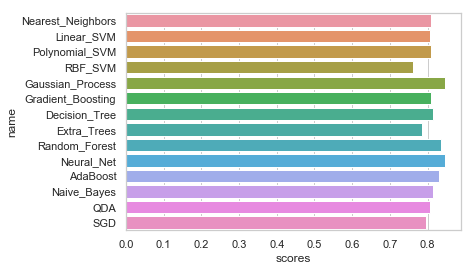

In [15]:
sns.set(style = "whitegrid")
ax = sns.barplot(y = "name",x = "scores",data = df)